In [39]:
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [41]:
cwd = os.getcwd()
files_no_coupling = [os.path.join(cwd, os.path.join('../data/data_no_coupling/', f)) \
        for f in os.listdir(os.path.join(cwd, '../data/data_no_coupling/'))]

files_not_shift_300 = [os.path.join(cwd, os.path.join('../data/data_multi_neurons/data_300_neurons_except_shift/', f)) \
        for f in os.listdir(os.path.join(cwd, '../data/data_multi_neurons/data_300_neurons_except_shift/'))]
files_shift_300 = [os.path.join(cwd, os.path.join('../data/data_multi_neurons/data_300_NEURONS/', f)) \
        for f in os.listdir(os.path.join(cwd, '../data/data_multi_neurons/data_300_NEURONS/'))]

files_triple_phase = [os.path.join(cwd, os.path.join('../data/data_triple_tangent_700/', f)) \
        for f in os.listdir(os.path.join(cwd, '../data/data_triple_tangent_700/'))]
files_shift = [os.path.join(cwd, os.path.join('../data/data_shift_700/', f)) \
        for f in os.listdir(os.path.join(cwd, '../data/data_shift_700/'))]

files_500 = [os.path.join(cwd, os.path.join('../data/data_multi_neurons/data_500_NEURONS/', f)) \
        for f in os.listdir(os.path.join(cwd, '../data/data_multi_neurons/data_500_NEURONS/'))]

files_900 = [os.path.join(cwd, os.path.join('../data/data_multi_neurons/data_900_NEURONS/', f)) \
        for f in os.listdir(os.path.join(cwd, '../data/data_multi_neurons/data_900_NEURONS/'))]

In [42]:
print(files_no_coupling)

['/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240413-235321-84af1b00.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-022332-3f5b1f33.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-091508-c8304cbc.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-060343-773c82fe.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-114559-4da97ee6.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240413-201126-4f298711.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_coupling/IntegratorTrial#20240414-042113-2fcb887e.npz', '/home/alicia/Documents/School/syde-552-project/processing/../data/data_no_couplin

In [43]:
# return num_neurons, average deviation from ground truth,
# integrated sum of RMSE
def return_error_vals(filename, coupling_check=False,timesteps=30000):
    data = np.load(filename)
    n_neurons = data['pi_n_neurons']
    if coupling_check: coupling = data['coupling_method'].item()
    else: coupling=None
    path = data['path'][0:timesteps]
    est = data['sim_path'][0:timesteps]
    dist = np.sqrt(np.sum((path - est)**2,axis=1))
    avg_dist = np.mean(dist)
    total_error = 0

    for i in range(1, dist.shape[0]):
        total_error = total_error + 0.001/2 * (dist[i-1]+ dist[i])


    return n_neurons.item(), coupling, avg_dist, total_error

In [44]:
return_error_vals(files_no_coupling[0])

(500, None, 0.057381620165173716, 1.7208961033326078)

In [45]:
avgs_no_coupling = {}
totals_no_coupling = {}

In [46]:
for f in files_no_coupling:
    n, _, dist, total = return_error_vals(f)

    if n not in avgs_no_coupling.keys():
        avgs_no_coupling[n] = [dist]
    elif len(avgs_no_coupling[n]) < 5 :
        avgs_no_coupling[n].append(dist)

    if n not in totals_no_coupling.keys():
        totals_no_coupling[n] = [total]
    elif len(totals_no_coupling[n]) < 5:
        totals_no_coupling[n].append(total)

In [47]:
num_neurons = [300, 500, 700, 900]
nn_averages = []
nn_avgs_error = []
nn_totals = []
nn_totals_error = []

for n in num_neurons:
    nn_averages.append(np.mean(avgs_no_coupling[n]))
    nn_avgs_error.append(np.std(avgs_no_coupling[n]))
    nn_totals.append(np.mean(totals_no_coupling[n]))
    nn_totals_error.append(np.std(totals_no_coupling[n]))

In [48]:
num_neurons = [300, 500, 700, 900]

In [49]:
avgs_coupling = {}
totals_coupling = {}

for n in num_neurons:
    avgs_coupling[n] = {}
    totals_coupling[n] = {}

In [50]:
for f in files_not_shift_300:
    n, c, dist, total = return_error_vals(f,coupling_check=True)
    print(c)
    if c == 'get_path_integrator_shift':
        pass

    if c not in avgs_coupling[300].keys():
        avgs_coupling[300][c] = [dist]
    elif len(avgs_coupling[300][c]) < 5 :
        avgs_coupling[300][c].append(dist)

    if c not in totals_coupling[300].keys():
        totals_coupling[300][c] = [total]
    elif len(totals_coupling[300][c]) < 5:
        totals_coupling[300][c].append(total)

get_path_integrator_phase
get_path_integrator_shift
get_path_integrator_phase
get_path_integrator_triple
get_path_integrator_phase
get_path_integrator_triple
get_path_integrator_shift
get_path_integrator_phase
get_path_integrator_shift
get_path_integrator_triple
get_path_integrator_phase
get_path_integrator_shift
get_path_integrator_triple
get_path_integrator_triple
get_path_integrator_shift
get_path_integrator_shift


In [51]:
for f in files_shift_300:
    n, c, dist, total = return_error_vals(f,coupling_check=True)

    if c not in avgs_coupling[300].keys():
        avgs_coupling[300][c] = [dist]
    elif len(avgs_coupling[300][c]) < 5 :
        avgs_coupling[300][c].append(dist)

    if c not in totals_coupling[300].keys():
        totals_coupling[300][c] = [total]
    elif len(totals_coupling[300][c]) < 5:
        totals_coupling[300][c].append(total)

In [52]:
for f in files_500:
    n, c, dist, total = return_error_vals(f,coupling_check=True)

    if c not in avgs_coupling[500].keys():
        avgs_coupling[500][c] = [dist]
    elif len(avgs_coupling[500][c]) < 5 :
        avgs_coupling[500][c].append(dist)

    if c not in totals_coupling[500].keys():
        totals_coupling[500][c] = [total]
    elif len(totals_coupling[500][c]) < 5:
        totals_coupling[500][c].append(total)

In [53]:
for f in files_900:
    n, c, dist, total = return_error_vals(f,coupling_check=True)

    if c not in avgs_coupling[900].keys():
        avgs_coupling[900][c] = [dist]
    elif len(avgs_coupling[900][c]) < 5 :
        avgs_coupling[900][c].append(dist)

    if c not in totals_coupling[900].keys():
        totals_coupling[900][c] = [total]
    elif len(totals_coupling[500][c]) < 5:
        totals_coupling[900][c].append(total)

In [54]:
for f in files_900:
    n, c, dist, total = return_error_vals(f,coupling_check=True)

    if c not in avgs_coupling[900].keys():
        avgs_coupling[900][c] = [dist]
    elif len(avgs_coupling[900][c]) < 5 :
        avgs_coupling[900][c].append(dist)

    if c not in totals_coupling[900].keys():
        totals_coupling[900][c] = [total]
    elif len(totals_coupling[900][c]) < 5:
        totals_coupling[900][c].append(total)

In [55]:
for f in files_triple_phase:
    n, c, dist, total = return_error_vals(f,coupling_check=True)

    if c == 'get_path_integrator_shift':
        pass

    if c not in avgs_coupling[700].keys():
        avgs_coupling[700][c] = [dist]
    elif len(avgs_coupling[700][c]) < 5 :
        avgs_coupling[700][c].append(dist)

    if c not in totals_coupling[700].keys():
        totals_coupling[700][c] = [total]
    elif len(totals_coupling[700][c]) < 5:
        totals_coupling[700][c].append(total)

In [56]:
for f in files_shift:
    n, c, dist, total = return_error_vals(f, coupling_check=True)

    if c not in avgs_coupling[700].keys():
        avgs_coupling[700][c] = [dist]
    elif len(avgs_coupling[700][c]) < 5 :
        avgs_coupling[700][c].append(dist)

    if c not in totals_coupling[700].keys():
        totals_coupling[700][c] = [total]
    elif len(totals_coupling[700][c]) < 5:
        totals_coupling[700][c].append(total)

In [57]:
print(totals_coupling[300].keys())

dict_keys(['get_path_integrator_phase', 'get_path_integrator_shift', 'get_path_integrator_triple'])


In [58]:
order = ['get_path_integrator_phase', 'get_path_integrator_triple', 'get_path_integrator_shift']

In [59]:
coupling_avgs = [[],[],[]]
coupling_avgs_stds = [[],[],[]]
coupling_totals = [[],[],[]]
coupling_totals_stds = [[],[],[]]

for (idx, c) in enumerate(order):
    print(idx,c)
    for n in num_neurons:
        if len(avgs_coupling[n][c]) < 5: print(n,c)
        if len(totals_coupling[n][c]) < 5: print(n,c)
        coupling_avgs[idx].append(np.mean(avgs_coupling[n][c]))
        coupling_avgs_stds[idx].append(np.std(avgs_coupling[n][c]))
        coupling_totals[idx].append(np.mean(totals_coupling[n][c]))
        coupling_totals_stds[idx].append(np.std(totals_coupling[n][c]))

0 get_path_integrator_phase
1 get_path_integrator_triple
2 get_path_integrator_shift


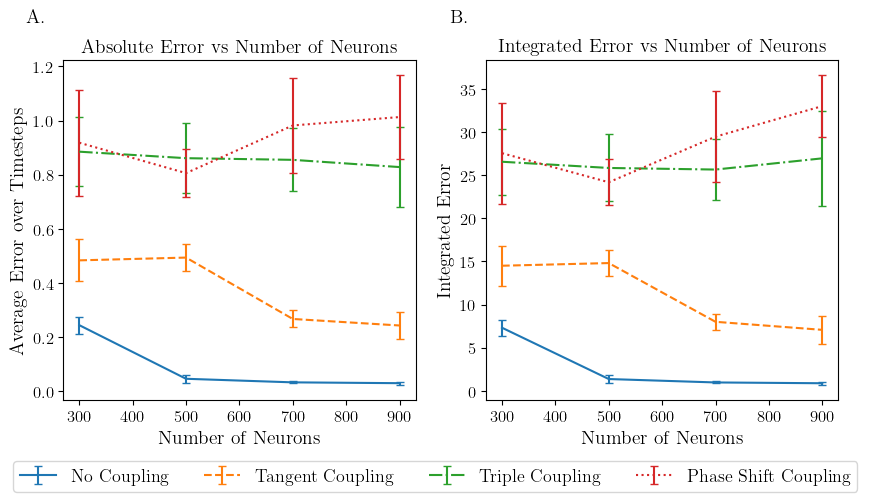

In [60]:

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].errorbar(num_neurons, nn_averages, nn_avgs_error,capsize=3,label='No Coupling')
ax[0].errorbar(num_neurons, coupling_avgs[0], coupling_avgs_stds[0], fmt='--',capsize=3,label='Tangent Coupling')
ax[0].errorbar(num_neurons, coupling_avgs[1], coupling_avgs_stds[1], fmt='-.',capsize=3,label='Triple Coupling')
ax[0].errorbar(num_neurons, coupling_avgs[2], coupling_avgs_stds[2], linestyle='dotted',capsize=3,label='Phase Shift Coupling')
ax[0].set_title('Absolute Error vs Number of Neurons',fontsize=14)
ax[0].set_ylabel('Average Error over Timesteps',fontsize=14)
ax[0].set_xlabel('Number of Neurons',fontsize=14)
ax[0].text(-0.05, 1.15, 'A.', transform=ax[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax[0].xaxis.set_tick_params(labelsize=12)
ax[0].yaxis.set_tick_params(labelsize=12)

ax[1].errorbar(num_neurons, nn_totals, nn_totals_error,capsize=3,label='No Coupling')
ax[1].errorbar(num_neurons, coupling_totals[0], coupling_totals_stds[0], fmt='--',capsize=3,label='Tangent Coupling')
ax[1].errorbar(num_neurons, coupling_totals[1], coupling_totals_stds[1], fmt='-.',capsize=3,label='Phase Shift Coupling')
ax[1].errorbar(num_neurons, coupling_totals[2], coupling_totals_stds[2], linestyle='dotted',capsize=3,label='Triple Coupling')
ax[1].set_title('Integrated Error vs Number of Neurons',fontsize=14)
ax[1].set_ylabel('Integrated Error',fontsize=14)
ax[1].set_xlabel('Number of Neurons',fontsize=14)
ax[1].text(-0.05, 1.15, 'B.', transform=ax[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].yaxis.set_tick_params(labelsize=12)


fig.subplots_adjust(bottom=0.2)
fig.legend(*ax[0].get_legend_handles_labels(),
            loc='lower center', ncol=4, fontsize=13)

plt.show()

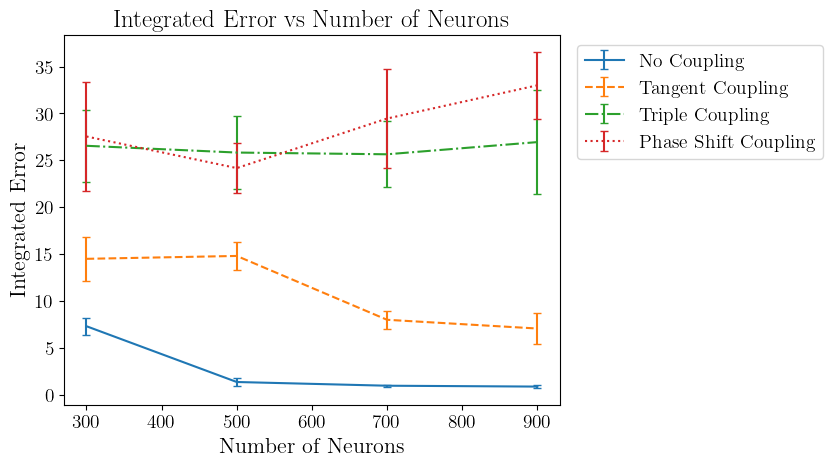

In [61]:

fig, ax = plt.subplots()

# ax[0].errorbar(num_neurons, nn_averages, nn_avgs_error,capsize=3,label='No Coupling')
# ax[0].errorbar(num_neurons, coupling_avgs[0], coupling_avgs_stds[0], fmt='--',capsize=3,label='Tangent Coupling')
# ax[0].errorbar(num_neurons, coupling_avgs[1], coupling_avgs_stds[1], fmt='-.',capsize=3,label='Phase Shift Coupling')
# ax[0].errorbar(num_neurons, coupling_avgs[2], coupling_avgs_stds[2], linestyle='dotted',capsize=3,label='Triple Coupling')
# ax[0].set_title('Absolute Error vs Number of Neurons',fontsize=14)
# ax[0].set_ylabel('Average Error over Timesteps',fontsize=14)
# ax[0].set_xlabel('Number of Neurons',fontsize=14)
# ax[0].text(-0.05, 1.15, 'A.', transform=ax[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
# ax[0].xaxis.set_tick_params(labelsize=12)
# ax[0].yaxis.set_tick_params(labelsize=12)

ax.errorbar(num_neurons, nn_totals, nn_totals_error,capsize=3,label='No Coupling')
ax.errorbar(num_neurons, coupling_totals[0], coupling_totals_stds[0], fmt='--',capsize=3,label='Tangent Coupling')
ax.errorbar(num_neurons, coupling_totals[1], coupling_totals_stds[1], fmt='-.',capsize=3,label='Triple Coupling')
ax.errorbar(num_neurons, coupling_totals[2], coupling_totals_stds[2], linestyle='dotted',capsize=3,label='Phase Shift Coupling')
ax.set_title('Integrated Error vs Number of Neurons',fontsize=18)
ax.set_ylabel('Integrated Error',fontsize=16)
ax.set_xlabel('Number of Neurons',fontsize=16)
# ax.text(-0.05, 1.15,, transform=ax[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.legend(loc='upper right', bbox_to_anchor=(1.55,1.0), fontsize=14)

#fig.subplots_adjust(bottom=0.2)
#fig.legend(*ax.get_legend_handles_labels(),
#            loc='lower center', ncol=4, fontsize=13)

plt.show()

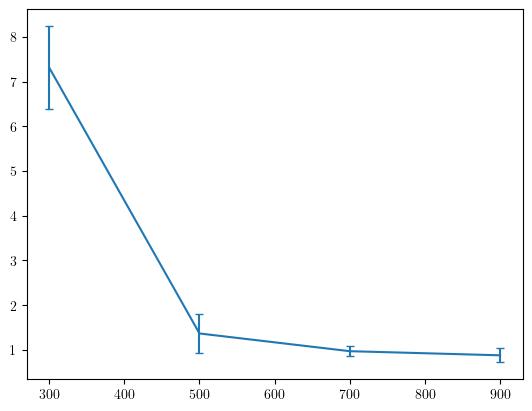

In [62]:
plt.errorbar(num_neurons, nn_totals, nn_totals_error,capsize=3,label='No Coupling')

plt.show()